# Numerical Approaches - Exercise Sheet 1

group: Anne, Dante, Ximena

## Exercise 1. Epsilon

### a) 

This is the code as given: 

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
NAME:      oldeps.py (module file)
FUNCTION:  This module contains a function to calculate epsilon - the old way
AUTHOR:    Joern Behrens, translated from Matlab to Python by Philipp Sommer, edited by JB.
"""

def oldeps():
  """
  FUNCTION:  determine/estimate EPS like in the old times
  SYNTAX:    oldeps()
  REFERENCE: C. Moler: Numerical Computing with MATLAB, SIAM, 2004
  VERSION:   1. original version
  AUTHOR:    J. Behrens (behrens@ma.tum.de)
  """
  ##--- switch to long format
  #format long
  
  #--- this is the crucial calculation with roundoff
  a= 4./ 3.
  
  #--- the rest can be done exactly in floating point representation
  b= a- 1.
  c= 3.* b
  e= 1.- c

  print(e)
  return e

#--- end of oldeps.m

if __name__=='__main__':
  oldeps()


2.220446049250313e-16


Here, the resulting machine epsilon is $\epsilon_{\text{old}} = 2.220446049250313 \times 10^{-16}$. 

### b) 

Another way to calculate the machine epsilon: 

In [4]:
def epsilon(): 
    """
    calculate machine epsilon
    input: none
    output: machine epsilon
    """
    eps = 1 # initialise eps
    while 1 + eps != 1: # while loop (as given by the definition of machine epsilon)
        eps_final = eps # save current eps for return
        eps = eps/2 # half eps and repeat
    return eps_final # returned: smallest eps that still satisfies while condition

epsilon() # returns the machine epsilon

2.220446049250313e-16

Here, the resulting machine epsilon is $\epsilon_{\text{new}} = 2.220446049250313 \times 10^{-16}$. 

### c) 

Both machine epsilons are the same; $\epsilon_{\text{old}} = \epsilon_{\text{new}}$. 



In a previous version of the code we got $\epsilon \approx 1.1 \times 10^{-16}$, or half of the correct value. This led us to correct the while loop. Per the definition of the machine epsilon given in the task, the machine epsilon is the last epsilon for which the while loop will execute. Therefore, `eps` mustn't be halved again during the last time the loop is executed. We solve this problem by introducing a  second variable `eps_final` as intermediate storage before halving `eps` itself. 

## Exercise 2. Linear System of Equations

### a) 

For sufficiently small $h$, the forward finite difference is defined as
\begin{align}
    (\delta_+ f) := \frac{f(x+h) - f(x)}{h} 
    \label{eq:forward}
\end{align}
and similarly the backward finite difference: 
\begin{align}
    (\delta_- f) := \frac{f(x) - f(x-h)}{h} \quad. 
    \label{eq:backward}
\end{align}
Applying the forward finite difference \eqref{eq:forward} to a function $u(x)$, we get
\begin{align*}
    (\delta_+ u) := \frac{u(x+h) - u(x)}{h} \quad. 
\end{align*}
Now we apply the backward finite difference \eqref{eq:backward} to this result and get
\begin{align*}
    \delta_- (\delta_+ u(x)) &= \delta_- \left( \frac{u(x+h)}{h} \right) - \delta_- \left( \frac{u(x)}{h} \right) \\
    &= \frac{u(x+h) - u(x)}{h^2} - \frac{u(x) - u(x-h)}{h^2} \\
    &= \frac{u(x+h) - 2 u(x) + u(x-h)}{h^2} \quad.      
\end{align*}
Since we applied finite difference approximations twice, this results approximates the second derivative and we have
\begin{align}
    \frac{d^2 u}{d x^2} \approx \frac{1}{h^2} \left[ u(x+h) - 2 u(x) + u(x-h) \right]
    \label{eq:differential}
\end{align}
as given in the task. 

### b) 

Our grid ranges from $a$ to $b$ with $N+1$ grid points and a grid size of $h = \frac{b-a}{N}$. Therefore, our gridpoints are defined as $ x_i = a + i \cdot h $
with $h = \frac{b-a}{N}$ and $i = 0, ..., N$ and endpoints $x_0 = a$ and $x_N = b$. 

### c) 

With the simplified notation $u(x_i) = u_i$ and the definition of the grid points, we can rewrite the discretised differential operator \eqref{eq:differential} as
\begin{align*}
    - \frac{d^2 u}{d x^2} \approx \frac{1}{h^2} \left[ - u_{i+1} + 2 u_i - u_{i-1} \right] = g = -10
\end{align*}
Translating this to a linear system of equations we get

\begin{align}
    \frac{1}{h^2}\cdot 
    \begin{pmatrix}
    2  & -1 &  0 & \dots  &  & & 0 \\
    -1 & 2  & -1 & 0  &  \dots  &   & 0 \\
    0  & -1 & 2  & -1 &  0 & \dots  & 0 \\
    \vdots & &   &    &    &   & \vdots \\
    0  &  \dots &    &    & 0    & -1 & 2
    \end{pmatrix}
    \cdot
    \begin{pmatrix}
    u_1 \\
    u_2 \\
    \vdots\\
    \\
    u_{N-1}
    \end{pmatrix}
    = 
    \begin{pmatrix}
    -10\\
    \vdots\\
    \\
    \\
    -10
    \end{pmatrix}
     \label{eq:lse}
\end{align} 

where the matrix has a size $(N-1)\cdot (N-1)$. 

### d)

To solve the linear system of equations: 

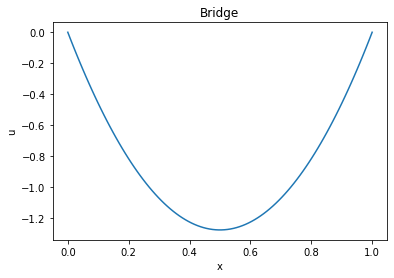

In [2]:
from numpy import *
from numpy.linalg import solve
import matplotlib.pyplot as plt

# Number of grid points
N = 100

# Constants
a = 0
b = 1
h = (b - a) / N

# System of equations
A = 2 * eye(N) - eye(N, k = 1) - eye(N, k = -1)
g = repeat(-10 * h ** 2, N)
u = solve(A, g)

# Adding the values for u_0 and u_N
u = insert(u, 0, 0)
u = append(u, 0)

# Plot
x = linspace(0, 1, N+2)
plt.plot(x, u)
plt.xlabel("x")
plt.ylabel("u")
plt.title("Bridge")
plt.show()
